# High Performance Python

### Activity 3



### Part 3 Dictionaries and Sets

12. Use the marco geoestadístico 2010
(https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=889463807469) and
2020 (https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=702825292812) to
obtain the “Áreas Geoestadísticas Básicas” (AGEBs) from Mérida, Yucatán. AGEBs
evolve on time. Use sets to find:
- AGEBs which remains from 2010 on 2020.
- New AGEBs on 2020.
- AGEBs that disappear from 2010 to 2020.

Make a map with the following visualization to observe all three cases.

In [53]:
# libraries
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Actually didn't understand why but it didnt work without this :c
import os
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

In [54]:
# Read the files from the first dataset and create columns for ENT and MUN
mx_2010 = gpd.read_file('AGEB_urb_2010_5.shp')

mx_2010["ENT"] = mx_2010['CVEGEO'].str.slice(0,2)
mx_2010["MUN"] = mx_2010["CVEGEO"].str.slice(2,5)

yc_2010 = mx_2010[mx_2010['ENT'] == '31']
mid_2010 = yc_2010[yc_2010["MUN"]=="050"]

In [56]:
# Read the files from the second dataset
yc_2020 = gpd.read_file('31a.shp')

mid_2020 = yc_2020[yc_2020["CVE_MUN"] == "050"]

mid_2010_set = set(mid_2010['CVEGEO'])
mid_2020_set = set(mid_2020['CVEGEO'])

In [57]:
# Using sets get the intersetction, and substraction (for new and gone zones)

remains = mid_2010_set.intersection(mid_2020_set)
remains = mid_2010[mid_2010['CVEGEO'].isin(remains)]

new = mid_2020_set - mid_2010_set
new = mid_2020[mid_2020['CVEGEO'].isin(new)]

gone = mid_2010_set - mid_2020_set
gone = mid_2010[mid_2010['CVEGEO'].isin(gone)]

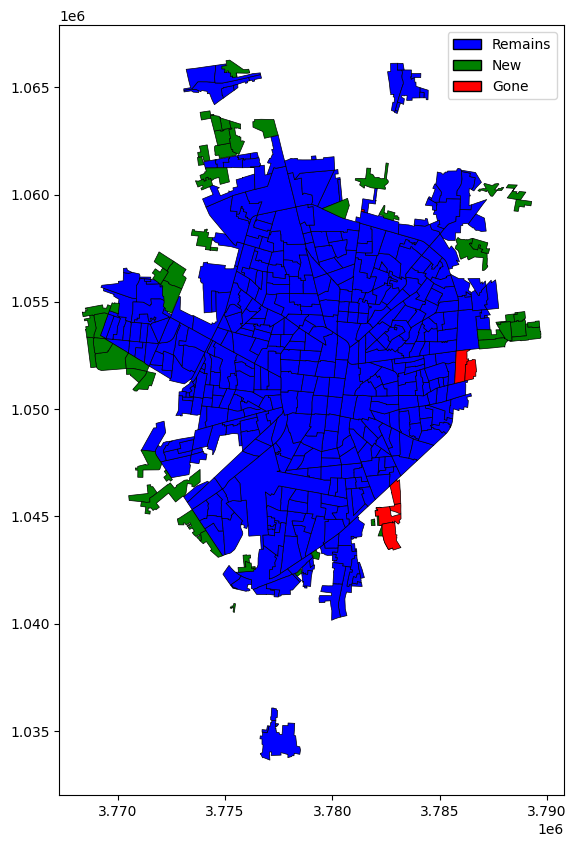

In [58]:
# plot the final dataframe
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

remains.plot(ax=ax, color='blue', edgecolor='black', linewidth=0.5)
new.plot(ax=ax, color='green', edgecolor='black', linewidth=0.5)
gone.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)

legend_elements = [Patch(facecolor='blue', edgecolor='black', label='Remains'),
                     Patch(facecolor='green', edgecolor='black', label='New'),
                     Patch(facecolor='red', edgecolor='black', label='Gone')]
ax.legend(handles=legend_elements, loc='upper right')

plt.show()